In [14]:
import os
import json
import pandas as pd

def find_and_extract_json(base_path):
    """
    Searches for AF3_JSON files containing '_summary_confidences_' in their name inside all directories,
    extracts specific metrics, and stores them in a DataFrame.
    """
    data_list = []
    
    # Iterate through all directories inside the base path
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        
        if os.path.isdir(folder_path):  # Check if it is a directory
            for file in os.listdir(folder_path):
                # Look for files containing '_summary_confidences_' and ending with .json
                if "_summary_confidences_" in file and file.endswith(".json"):
                    file_path = os.path.join(folder_path, file)
                    
                    # Open and read the JSON file
                    with open(file_path, "r") as f:
                        data = json.load(f)
                        
                        # Extract relevant values if they exist
                        if all(key in data for key in ["chain_iptm", "chain_pair_pae_min", "chain_ptm", "iptm", "ptm"]):
                            name = file.replace("_summary_confidences_", "_model_").replace(".json", "")
                            chain_iptm_A, chain_iptm_B = data["chain_iptm"]
                            chain_ptm_A, chain_ptm_B = data["chain_ptm"]
                            chain_pair_pae_min_AB = data["chain_pair_pae_min"][0][1]
                            chain_pair_pae_min_BA = data["chain_pair_pae_min"][1][0]
                            iptm = data["iptm"]
                            ptm = data["ptm"]
                            
                            # Append the data to the list
                            data_list.append([name, iptm, ptm, chain_iptm_A, chain_iptm_B, chain_ptm_A, chain_ptm_B, chain_pair_pae_min_AB, chain_pair_pae_min_BA])
    
    # Create DataFrame with reordered columns
    columns = ["name", "iptm", "ptm", "chain_iptm_A", "chain_iptm_B", "chain_ptm_A", "chain_ptm_B", "chain_pair_pae_min_AB", "chain_pair_pae_min_BA"]
    df = pd.DataFrame(data_list, columns=columns)
    return df

if __name__ == "__main__":
    # Define the base directory (use current working directory for Jupyter compatibility)
    base_directory = os.getcwd()
    
    # Find and extract relevant data
    df_results = find_and_extract_json(base_directory)
    
    # Save DataFrame to CSV
    output_path = os.path.join(base_directory, "extracted_pae_data.csv")
    df_results.to_csv(output_path, index=False)
    
    print(f"Extracted data saved in {output_path}")


Extracted data saved in ..\extracted_pae_data.csv


In [15]:
# Calculates the average of the two chain pair PAE minimum values
df_results['chain_pair_pae_min_average'] = df_results[['chain_pair_pae_min_AB', 'chain_pair_pae_min_BA']].mean(axis=1)
df_results.describe().T

,count,mean,std,min,25%,50%,75%,max
iptm,250.0,0.39704,0.199520,0.080,0.25000,0.3300,0.50000,0.89
ptm,250.0,0.67020,0.092764,0.520,0.60000,0.6500,0.71000,0.90
chain_iptm_A,250.0,0.39704,0.199520,0.080,0.25000,0.3300,0.50000,0.89
chain_iptm_B,250.0,0.39704,0.199520,0.080,0.25000,0.3300,0.50000,0.89
chain_ptm_A,250.0,0.69464,0.150813,0.320,0.61000,0.7300,0.83000,0.87
chain_ptm_B,250.0,0.82784,0.017973,0.760,0.82000,0.8300,0.84000,0.89
chain_pair_pae_min_AB,250.0,7.35600,3.893351,0.880,4.34750,7.6100,9.88250,20.15
chain_pair_pae_min_BA,250.0,6.29336,2.944685,0.930,3.95750,6.7750,8.29000,18.71
chain_pair_pae_min_average,250.0,6.82468,3.393309,0.905,4.23875,7.1675,9.07125,19.43


In [16]:
df_results.head(10)

,name,iptm,ptm,chain_iptm_A,chain_iptm_B,chain_ptm_A,chain_ptm_B,chain_pair_pae_min_AB,chain_pair_pae_min_BA,chain_pair_pae_min_average
0,fold_binder_11_top_1_model_0,0.36,0.69,0.36,0.36,0.67,0.84,7.61,6.73,7.170
1,fold_binder_11_top_1_model_1,0.35,0.68,0.35,0.35,0.64,0.83,7.38,6.93,7.155
2,fold_binder_11_top_1_model_2,0.33,0.68,0.33,0.33,0.66,0.83,7.62,7.36,7.490
3,fold_binder_11_top_1_model_3,0.31,0.67,0.31,0.31,0.67,0.83,7.98,7.62,7.800
4,fold_binder_11_top_1_model_4,0.30,0.67,0.30,0.30,0.67,0.82,7.85,7.37,7.610
5,fold_binder_11_top_2_model_0,0.52,0.73,0.52,0.52,0.70,0.82,3.68,3.71,3.695
6,fold_binder_11_top_2_model_1,0.51,0.73,0.51,0.51,0.70,0.82,3.68,3.59,3.635
7,fold_binder_11_top_2_model_2,0.42,0.70,0.42,0.42,0.68,0.81,4.32,4.54,4.430
8,fold_binder_11_top_2_model_3,0.40,0.70,0.40,0.40,0.68,0.81,4.53,4.54,4.535
9,fold_binder_11_top_2_model_4,0.38,0.70,0.38,0.38,0.68,0.82,4.47,4.50,4.485


**FILTERING**

In [18]:
# Filter the values with iPTM >= 0.6 and chain_iptm_A > 0.5.
df_filtered = df_results[(df_results["iptm"] >= 0.6) & (df_results["chain_ptm_A"] > 0.5)].copy()
df_filtered.sort_values(by=["chain_pair_pae_min_average"], ascending=True, inplace=True)
df_filtered

,name,iptm,ptm,chain_iptm_A,chain_iptm_B,chain_ptm_A,chain_ptm_B,chain_pair_pae_min_AB,chain_pair_pae_min_BA,chain_pair_pae_min_average
30,fold_binder_13_top_2_model_0,0.89,0.90,0.89,0.89,0.83,0.89,0.88,0.93,0.905
31,fold_binder_13_top_2_model_1,0.87,0.90,0.87,0.87,0.83,0.88,0.90,0.97,0.935
33,fold_binder_13_top_2_model_3,0.87,0.89,0.87,0.87,0.83,0.87,0.90,0.97,0.935
32,fold_binder_13_top_2_model_2,0.87,0.90,0.87,0.87,0.82,0.88,0.91,0.99,0.950
34,fold_binder_13_top_2_model_4,0.87,0.89,0.87,0.87,0.82,0.87,0.90,1.00,0.950
45,fold_binder_13_top_5_model_0,0.83,0.87,0.83,0.83,0.81,0.86,1.23,1.35,1.290
75,fold_binder_15_top_1_model_0,0.82,0.88,0.82,0.82,0.73,0.88,1.28,1.33,1.305
46,fold_binder_13_top_5_model_1,0.81,0.86,0.81,0.81,0.81,0.84,1.25,1.38,1.315
76,fold_binder_15_top_1_model_1,0.81,0.87,0.81,0.81,0.71,0.86,1.31,1.37,1.340
49,fold_binder_13_top_5_model_4,0.81,0.85,0.81,0.81,0.81,0.84,1.27,1.42,1.345


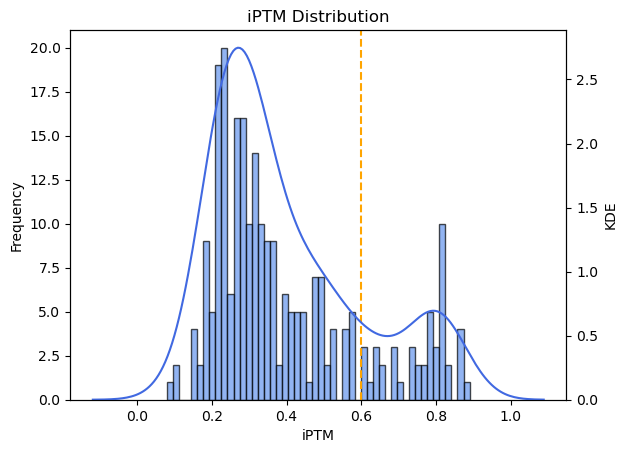

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, ax1 = plt.subplots()

# Plot iPTM distribution
ax1.hist(df_results['iptm'], bins=50, color='cornflowerblue',  edgecolor = 'black', alpha=0.7, label='iPTM')
ax1.set_title('iPTM Distribution')  
ax1.set_xlabel('iPTM')
ax1.set_ylabel('Frequency')

# Threshold line
plt.axvline(x = 0.6, color = 'orange', linestyle='--', label='0.6')

# Plot KDE on the same axis
import seaborn as sns
ax2 = ax1.twinx() 
sns.kdeplot(df_results['iptm'], color='royalblue', ax=ax2, label='KDE iPTM')
ax2.set_ylabel('KDE')
ax2.tick_params(axis='y')


#plt.savefig("iPTM_round_1.png", dpi=600)
plt.show()